<a href="https://colab.research.google.com/github/RAVILAKSHMISNEHITHA/Codesoft-Task1/blob/main/codesoft_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Essential Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Installing Packages:**

In [ ]:
# Example of installing a package
!pip install package_name

  Preparing metadata (setup.py) ... done
  Created wheel for package_name: filename=package_name-0.1-py3-none-any.whl size=1229 sha256=3f05077d3537b4490ff3482bb9874f22d280edcd8099b9e2ca67c2b99478285d
  Stored in directory: /root/.cache/pip/wheels/b3/c1/6f/538e951eb00f535f43151173b4c55e463a35c17b9e90ab3b1a
Successfully built package_name


**Upload the Dataset:**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


**Load the Dataset:**

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')  # Make sure the filename matches your uploaded file

**Exploring the Dataset:**

In [ ]:
print(df.head())  # View the first few rows
print(df.info())  # Get a summary of the dataset
print(df.describe())  # Statistical overview
print(df.isnull().sum())  # Check for null values

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

**Data Cleaning:**

In [ ]:
# Fill missing values in the 'Age' column with the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Drop rows with missing 'Embarked' values
df.dropna(subset=['Embarked'], inplace=True)

# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

**Data Visualization:**

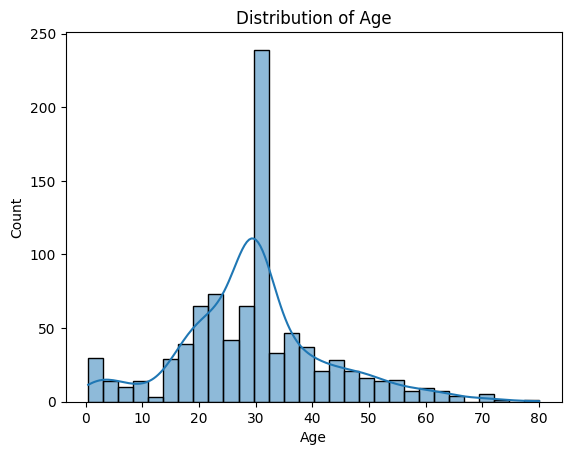

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

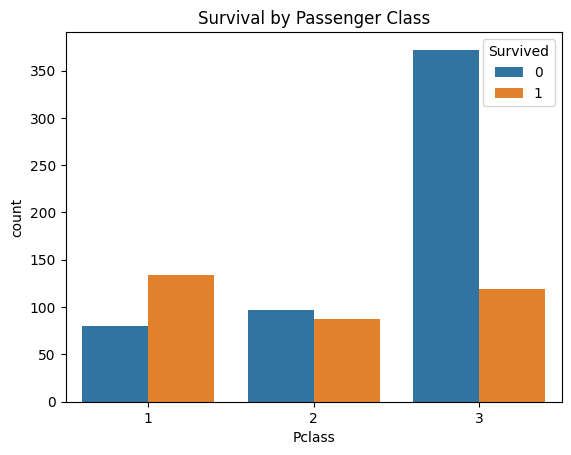

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

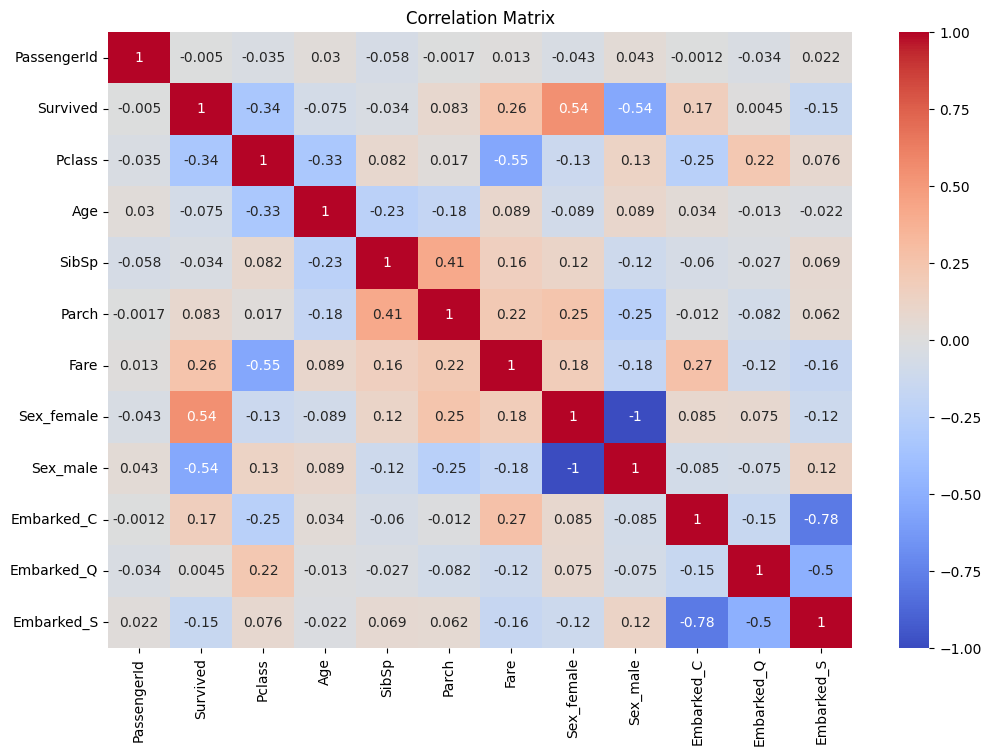

In [ ]:
# Drop non-numerical columns before calculating correlation
df_numerical = df.drop(['Ticket', 'Name', 'Cabin'], axis=1)

# Calculate and plot the correlation matrix
corr_matrix = df_numerical.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Building a Simple Model:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training the Model:**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Sample data
data = {
    'Name': ['Olsson, Mr. Nils Johan Goransson', 'Smith, Mr. John', 'Doe, Mr. Jane'],
    'Age': [35, 42, 23]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create LabelEncoder object
le = LabelEncoder()

# Fit and transform the Name column
df['Name'] = le.fit_transform(df['Name'])

# Now df contains numerical values in the Name column
print(df)

# Prepare your data (X, y)
X_test = df.drop('Age', axis=1)
y_test = df['Age']

# Create RandomForestClassifier model and fit the data
model = RandomForestClassifier(random_state=42)
model.fit(X_test, y_test)


   Name  Age
0     1   35
1     2   42
2     0   23


RandomForestClassifier(random_state=42)

**Making Predictions and Evaluatimg Model:**

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


**Saving the Model:**

In [ ]:
import joblib
joblib.dump(model, 'titanic_model.pkl')

['titanic_model.pkl']

**Loading the Model:**

In [ ]:
loaded_model = joblib.load('titanic_model.pkl')

**Showing the First Few Predictions:**

In [ ]:
predicted = pd.DataFrame({'PassengerId': X_test.index, 'Survived': y_pred})
print(predicted.head())

   PassengerId  Survived
0            0        35
1            1        42
2            2        23
